\begin{center}
Gabe Morris
\end{center}

In [1]:
import sympy as sp
import control as ct
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

plt.style.use('../maroon_ipynb.mplstyle')

\pagebreak
\tableofcontents
\pagebreak

\begin{center}
\begin{tabular}{ccc}
ME 3613 & Homework 4 & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

# Problem 1
## Given

![Figure 1](f1.PNG)

## Find
Find the transfer function $\frac{Y(s)}{F(s)}$ for the block diagram.

## Solution
The solution can be determined using two different methods. The first is an algebraic solution where B is the expression after the first block seen above. The second can be determined using the feedback and series functions.

In [2]:
# Using algebra
from sympy.abc import F, Y, B, s

eq1 = sp.Eq((F - 9*B - 7*Y)*1/(s + 2), B)
eq2 = sp.Eq((B*5 - 12*Y)*1/s, Y)
display(eq1, eq2)

Eq((-9*B + F - 7*Y)/(s + 2), B)

Eq((5*B - 12*Y)/s, Y)

In [3]:
sol = sp.solve([eq1, eq2], [Y, B], dict=True)[0]
sol[Y]/F

5/(s**2 + 23*s + 167)

In [4]:
sys1 = ct.feedback(ct.tf(1, [1, 0]), 12)
sys2 = ct.series(5, sys1)
sys3 = ct.feedback(ct.tf(1, [1, 2]), 9)
sys4 = ct.series(sys3, sys2)
sys5 = ct.feedback(sys4, 7)
sys5

TransferFunction(array([5]), array([  1,  23, 167]))

\pagebreak

\begin{center}
\begin{tabular}{ccc}
ME 3613 & Homework 4 & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

# Problem 2
## Given

![Figure 2](f2.PNG)

$$L=500\,mH,\ C=100\,\mu F,\ R=300\,\Omega$$

$$v_1=5e^{-t}\sin(6t)\,V,\ v_2=10\sin(t)\,V$$

All initial conditions are zero.

## Find

a. The system of ODE's (should be two equations if using mesh currents).
b. Solve the system for $i_1$, $i_2$, and $i_3$ as seen the figure above. Use any method to find the result and plot up to 6 seconds.

## Solution
### Part A

In [5]:
L_, C_, R_ = 500e-3, 100e-6, 300

L, C, R = sp.symbols('L C R')
t = sp.Symbol('t')
V1 = sp.Function('v_1')(t)
V2 = sp.Function('v_2')(t)
iA = sp.Function('i_A')(t)  # Mesh currents
iB = sp.Function('i_B')(t)  # Mesh currents

eq1 = sp.Eq(L*iA.diff() + R*(iA - iB), V1)  # KVL around iA
eq2 = sp.Eq(1/C*iB + R*(iB.diff() - iA.diff()) + V2.diff(), 0)  # KVL around iB
display(eq1, eq2)

Eq(L*Derivative(i_A(t), t) + R*(i_A(t) - i_B(t)), v_1(t))

Eq(R*(-Derivative(i_A(t), t) + Derivative(i_B(t), t)) + Derivative(v_2(t), t) + i_B(t)/C, 0)

### Part B
The state variable solution is the easiest since we already have a system of first order ODE's.

In [6]:
# Solving using state variables
state_sol = sp.solve([eq1, eq2], [iA.diff(), iB.diff()], dict=True)[0]
for key, value in state_sol.items(): display(sp.Eq(key, value))

Eq(Derivative(i_A(t), t), -R*i_A(t)/L + R*i_B(t)/L + v_1(t)/L)

Eq(Derivative(i_B(t), t), -Derivative(v_2(t), t)/R - R*i_A(t)/L + R*i_B(t)/L + v_1(t)/L - i_B(t)/(C*R))

In [7]:
# Getting the analytical solution
subs = [
    (L, sp.S(str(L_))),
    (R, sp.S(str(R_))),
    (C, sp.S(str(C_))),
    (V1, 5*sp.exp(-t)*sp.sin(6*t)),
    (V2.diff(), 10*sp.cos(t))
]

eq1_subs = eq1.subs(subs)
eq2_subs = eq2.subs(subs)
display(eq1_subs, eq2_subs)

Eq(300*i_A(t) - 300*i_B(t) + 0.5*Derivative(i_A(t), t), 5*exp(-t)*sin(6*t))

Eq(10000.0*i_B(t) + 10*cos(t) - 300*Derivative(i_A(t), t) + 300*Derivative(i_B(t), t), 0)

In [8]:
d_sol = sp.dsolve([eq1_subs, eq2_subs], ics={
    iA.subs(t, 0): 0,
    iB.subs(t, 0): 0
})
display(*d_sol)

Eq(i_A(t), -1.66682871529138e-6*sin(t)*sin(140.435829552939*t)**2 + 8.470329472543e-22*sin(t)*sin(140.435829552939*t)*cos(140.435829552939*t) - 1.66682871529138e-6*sin(t)*cos(140.435829552939*t)**2 - 0.00100004722431337*sin(140.435829552939*t)**2*cos(t) - 0.00100004722431337*cos(t)*cos(140.435829552939*t)**2 - 0.000894252621170149*exp(-16.6666666666665*t)*sin(140.435829552939*t) - 0.0018569732844178*exp(-16.6666666666665*t)*cos(140.435829552939*t) + 0.0162490402135116*exp(-1.0*t)*sin(6.0*t)*sin(140.435829552939*t)**2 + 0.0162490402135116*exp(-1.0*t)*sin(6.0*t)*cos(140.435829552939*t)**2 + 0.00285702050873119*exp(-1.0*t)*sin(140.435829552939*t)**2*cos(6.0*t) - 2.71050543121376e-19*exp(-1.0*t)*sin(140.435829552939*t)*cos(6.0*t)*cos(140.435829552939*t) + 0.00285702050873119*exp(-1.0*t)*cos(6.0*t)*cos(140.435829552939*t)**2)

Eq(i_B(t), -8.33414357648159e-11*sin(t)*sin(140.435829552939*t)**2 + 8.470329472543e-22*sin(t)*sin(140.435829552939*t)*cos(140.435829552939*t) - 8.33414357646041e-11*sin(t)*cos(140.435829552939*t)**2 - 0.00100005000236123*sin(140.435829552939*t)**2*cos(t) - 0.00100005000236123*cos(t)*cos(140.435829552939*t)**2 - 0.000434769631157325*exp(-16.6666666666665*t)*sin(140.435829552939*t) - 0.00201469920765718*exp(-16.6666666666665*t)*cos(140.435829552939*t) - 0.000473278391931575*exp(-1.0*t)*sin(6.0*t)*sin(140.435829552939*t)**2 - 0.000473278391931576*exp(-1.0*t)*sin(6.0*t)*cos(140.435829552939*t)**2 + 0.00301474921001842*exp(-1.0*t)*sin(140.435829552939*t)**2*cos(6.0*t) - 2.71050543121376e-19*exp(-1.0*t)*sin(140.435829552939*t)*cos(6.0*t)*cos(140.435829552939*t) + 0.00301474921001842*exp(-1.0*t)*cos(6.0*t)*cos(140.435829552939*t)**2)

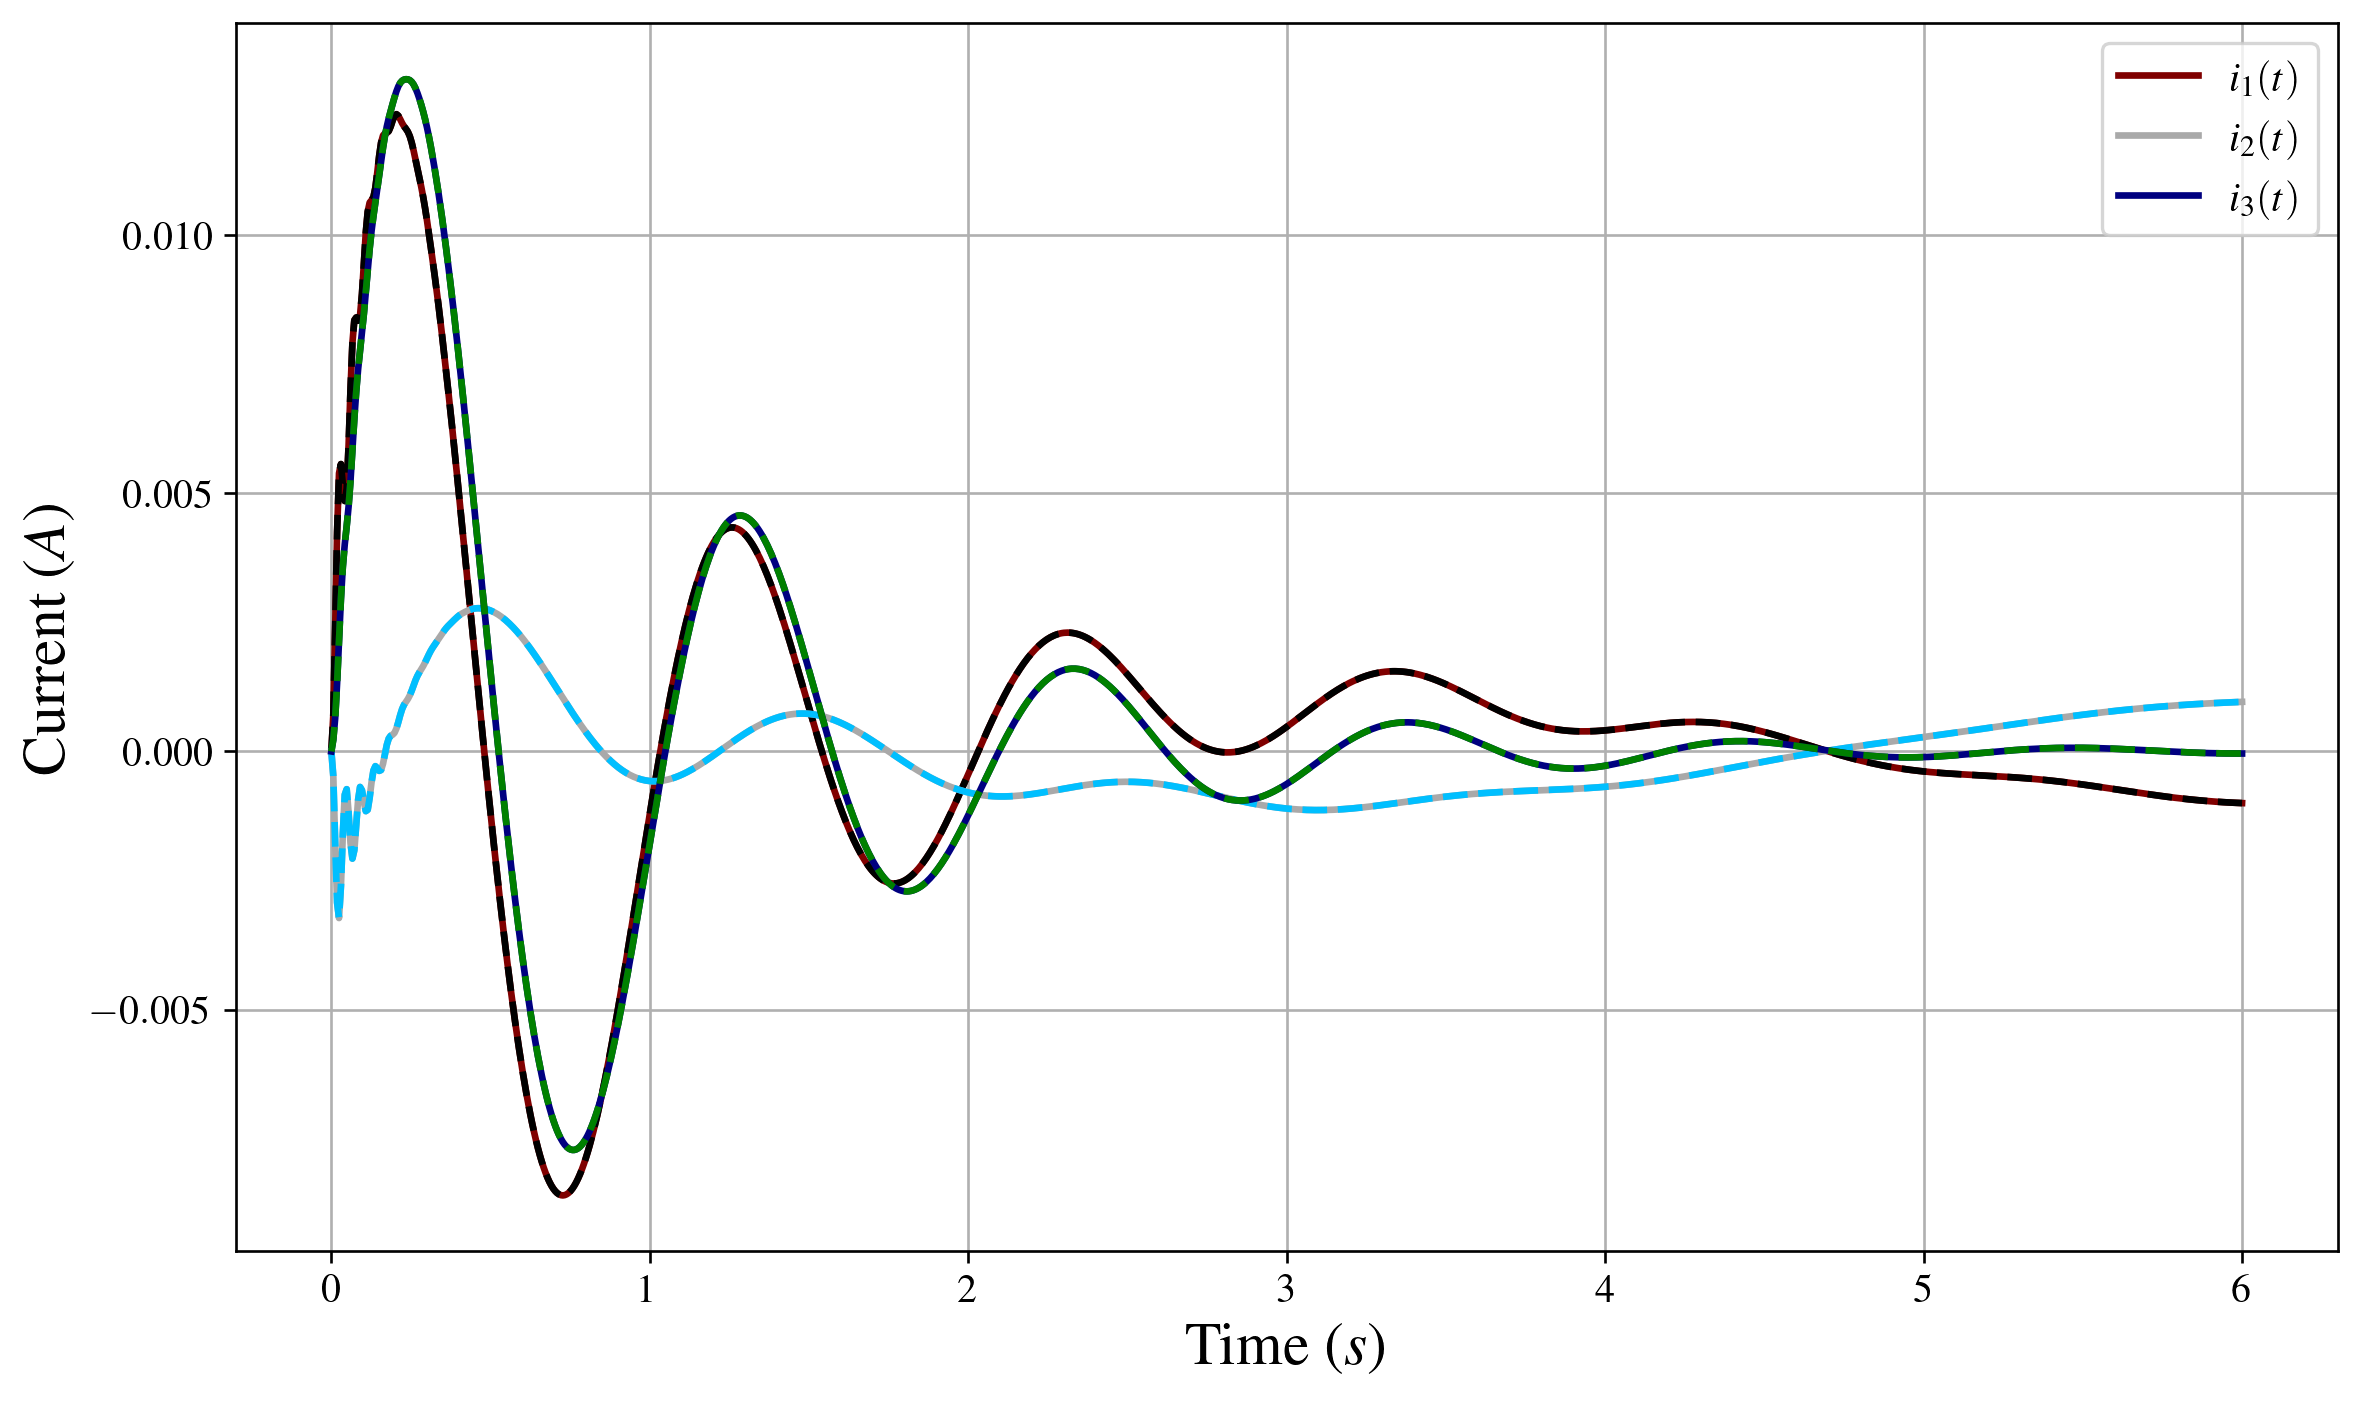

In [10]:
v1 = lambda t_: 5*np.exp(-t_)*np.sin(6*t_)
v2_diff = lambda t_: 10*np.cos(t_)
iA_lamb = sp.lambdify(t, d_sol[0].rhs, modules='numpy')
iB_lamb = sp.lambdify(t, d_sol[1].rhs, modules='numpy')

def state_vars(i, t_):
    return [
        (v1(t_) + R_*i[1] - R_*i[0])/L_,
        -v2_diff(t_)/R_ - R_/L_*i[0] + R_/L_*i[1] + v1(t_)/L_ - i[1]/(C_*R_)
    ]


t_array = np.linspace(0, 6, 1000)
sol = odeint(state_vars, (0, 0), t_array)
iA, iB = sol[:, 0], sol[:, 1]

plt.plot(t_array, iA, label='$i_1(t)$')
plt.plot(t_array, iA_lamb(t_array), ls='--')
plt.plot(t_array, -iB, label='$i_2(t)$')
plt.plot(t_array, -iB_lamb(t_array), ls='--')
plt.plot(t_array, iA - iB, label='$i_3(t)$')
plt.plot(t_array, iA_lamb(t_array) - iB_lamb(t_array), ls='--')
plt.legend()
plt.xlabel('Time ($s$)')
plt.ylabel('Current ($A$)')
plt.show()